# Capstone #3: Restaurant Sales Forecasting

### Problem Statement:
“Fresh Analytics” is a data analytics company that wants to understand and forecast demand for different items across restaurants. You’ve been tasked with building a forecast model using sales data for 3 years for 100 items across 6 restaurants.

### Overview:
In an ever-changing competitive market, there is a need to take correct decisions and plan for future events that may affect the business. Demand is the most important aspect for a business to achieve its objectives. Many business decisions depend on demand like production, sales, staff requirement, etc. Forecasting is the necessity of business at an international level as well as domestic level.
Time series analysis serves as the basis for the demand forecast. Tracking selected independent variables over a defined period enables forecasting predictable fluctuations in demand according to a prevailing trend, such as peak versus low periods.

### Input Dataset:
There are three datasets:
1.	__sales.csv__: This dataset contains the count of a particular item sold at a particular store/restaurant for different dates.

<table>
    <tr>
        <th>Sno.</th>
        <th>Variable</th>
        <th>Description</th>
    </tr>
    <tr>
        <th>1.</th>
        <th>Date</th>
        <th>Date of purchase</th>
    </tr>
    <tr>
        <th>2.</th>
        <th>item_id</th>
        <th>Item bought</th>
    </tr>
    <tr>
        <th>3.</th>
        <th>Price</th>
        <th>Unit price of the item bought</th>
    </tr>
    <tr>
        <th>4.</th>
        <th>item_count</th>
        <th>Total Count of the item bought on that day</th>
    </tr>
</table>

2.	__items.csv__: This dataset contains information about items.

<table>
    <tr>
        <th>Sno.</th>
        <th>Variable</th>
        <th>Description</th>
    </tr>
    <tr>
        <th>1.</th>
        <th>id</th>
        <th>Item id</th>
    </tr>
    <tr>
        <th>2.</th>
        <th>store_id</th>
        <th>Store at which the item is available</th>
    </tr>
    <tr>
        <th>3.</th>
        <th>name</th>
        <th>Name of the item</th>
    </tr>
    <tr>
        <th>4.</th>
        <th>kcal</th>
        <th>Measure of energy nutrients (calories) in the item</th>
    </tr>
    <tr>
        <th>5.</th>
        <th>cost</th>
        <th>Unit price of the item bought</th>
    </tr>
</table>

3.	__restaurants.csv__: This dataset provides information about the restaurants / store.

<table>
    <tr>
        <th>Sno.</th>
        <th>Variable</th>
        <th>Description</th>
    </tr>
    <tr>
        <th>1.</th>
        <th>id</th>
        <th>Restaurant/store id</th>
    </tr>
    <tr>
        <th>2.</th>
        <th>name</th>
        <th>Name of the item</th>
    </tr>
</table>

### Directions:

1. Preliminary analysis. </br>
    a. Import the datasets. </br>
    b. Check for shape structure and anomalies in the dataset.	</br>
    c. Merge data to create a single dataset with date item id, price, item count, item names, kcal values, store id, and store name.</br>

2. Exploratory data analysis: </br>
    a. Study overall sales at the date level to understand the sales pattern. </br>
    b. What are the sales values across different days of the week? </br>
    c. Are there any specific observations for sales data for different months of the year? </br>
    d. Observe the distribution of sales across different quarters averaged over years. Do you find any pattern in sales? </br>
    e. How are the different restaurants performing? Which restaurant had the most sales? Also study the sales for each restaurant across different years months and days. </br>
    f. Which are the most popular items (overall) and which restaurants are selling these items? Also, find out the most popular item at each restaurant. </br>
    g. Is the restaurant with the highest number of sales also making the most money per day? </br>
    h. What is the costliest item at each of the restaurants and what are their calorie counts? </br>
3. Forecasting using Machine Learning Algorithms </br>
    a. Develop a linear regression, random forest, and XGBoost model to predict for the model with the given data. Compare and comment on the results obtained. </br>
        i. Create required features for development of these models like day of the week, quarter of the year, month, year, day of the month etc.
        ii. Use the last 6 months data as test data.
        iii. Compute the RMSE values for each of the models to compare their performances.
        iv. Also use the best models to forecast for 1 year.
    b. Time Series Modelling : </br>
        i. Plot seasonality, trend, and irregular components over time for the sales data.
        ii. Based on trend and seasonality, choose an appropriate exponential smoothing method to forecast using last six months of the data as validation set.
        iii. Perform augmented Dickey-Fuller test (ADF) to check for stationarity for time series.
        iv. Look at the ACF and PACF plots and strategize for ARIMA modeling. Find appropriate values of p, d and q and forecast for next 3 months. For model validation, find the MAPE of 3 months.
    c. Develop each of the models to check if a restaurant wise analysis might yield a better forecast. </br>
4. Forecasting using Deep Learning Algorithms: </br>
    a. Use sales amount for predictions here instead of item count. </br>
    b. Develop a LSTM model for predictions. </br>
        i. Define train and test series as above.
        ii. Generate Synthetic data for last 12 months.
        iii. Define a LSTM model. Compile and train the model.
        iv. Use the model for evaluation predicting for the test data.
    c. Compute MAPE and comment on the  model performance. </br>
    d. Now, develop another model using the entire series for training and use it to forecast for the next 3 months. </br>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.8 MB/s eta 0:00:0000:0100:01
DEPRECATION: beakerx-base 2.0.1 has a non-standard dependency specifier ipywidgets<8pandas,>=7.5.1. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of beakerx-base or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
# for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for prediction models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# time series forecast
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from pmdarima.arima import auto_arima

# time series forecast using deep learning
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# plt.style.use("fivethirtyeight")
pal = sns.color_palette()
pal_list = list(pal)

# for image study
import torch
import datetime as dt
import os
import tqdm


2023-11-17 12:50:06.574318: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2023-11-17 12:50:09.128638: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [2]:
items = pd.read_csv('items.csv')
restaurants = pd.read_csv('resturants.csv')
sales = pd.read_csv('sales.csv')

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB


In [4]:
sales.date = pd.to_datetime(sales.date)

In [5]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


In [6]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


## Merge data to create a single dataset with date item id, price, item count, item names, kcal values, store id and store name.


In [7]:
sales.head(2)

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0


In [8]:
items.head(2)

,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09


In [9]:
sales.shape

(109600, 4)

In [10]:
merged_data = pd.merge(sales, items, left_on = "item_id", right_on = "id", how = "left")

In [11]:
restaurants

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


In [12]:
merged_data.head(2)

,date,item_id,price,item_count,id,store_id,name,kcal,cost
0,2019-01-01,3,29.22,2.0,3,1,Sweet Fruity Cake,931,29.22
1,2019-01-01,4,26.42,22.0,4,1,Amazing Steak Dinner with Rolls,763,26.42


In [13]:
data = pd.merge(merged_data, restaurants, left_on = 'store_id', right_on = 'id')

In [14]:
data.head(2)

,date,item_id,price,item_count,id_x,store_id,name_x,kcal,cost,id_y,name_y
0,2019-01-01,3,29.22,2.0,3,1,Sweet Fruity Cake,931,29.22,1,Bob's Diner
1,2019-01-01,4,26.42,22.0,4,1,Amazing Steak Dinner with Rolls,763,26.42,1,Bob's Diner


In [15]:
(data.item_id == data.id_x).all()

True

In [16]:
(data.store_id == data.id_y).all()

True

## Rename the columns for easier understanding and drop the duplicate columns

In [17]:
data.rename(columns = {"name_x" : "item_name", "name_y": "restaurant_name"}, inplace = True)

In [18]:
data.drop(columns = ['id_x', 'id_y', 'cost'], inplace = True)

In [19]:
data.head(2)

,date,item_id,price,item_count,store_id,item_name,kcal,restaurant_name
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner


# Study overall sales date-wise to understand the sales pattern.

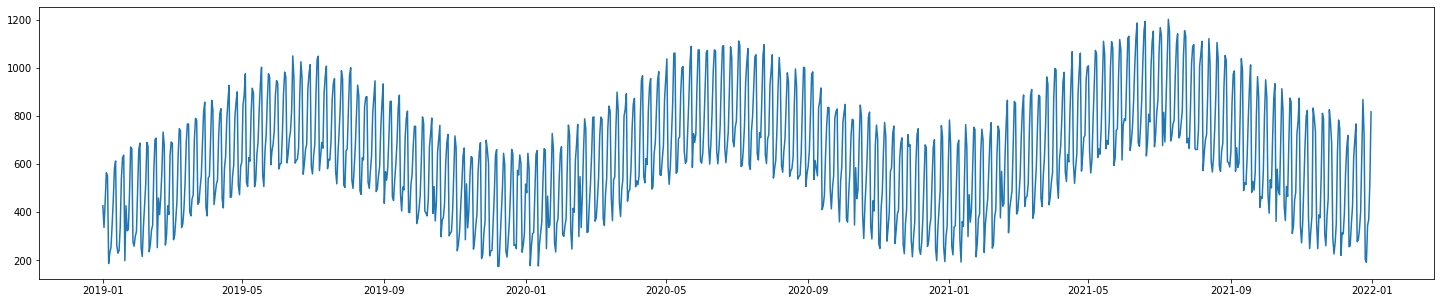

In [20]:
grpd = sales.groupby(['date'])[['item_count']].sum()
plt.figure(figsize = (25,5))
plt.plot(grpd)
plt.show()

## What are the sales values across different days of the week?

In [21]:
data['weekday'] = data.date.dt.day_name()

In [22]:
import calendar
day_names = list(calendar.day_name)

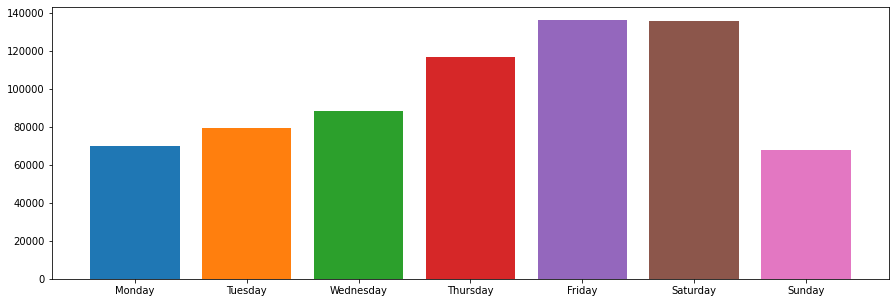

In [23]:
grpd = data.groupby(['weekday'])[['item_count']].sum()
grpd = grpd.loc[day_names].squeeze()
plt.figure(figsize = (15,5))
plt.bar(height = grpd.values, x = grpd.index, color = pal)
plt.show()

## Are there any specific observations for sales data for different months of the year?

In [24]:
data['month_name'] = data.date.dt.month_name()

In [25]:
months = list(calendar.month_name)[1:]

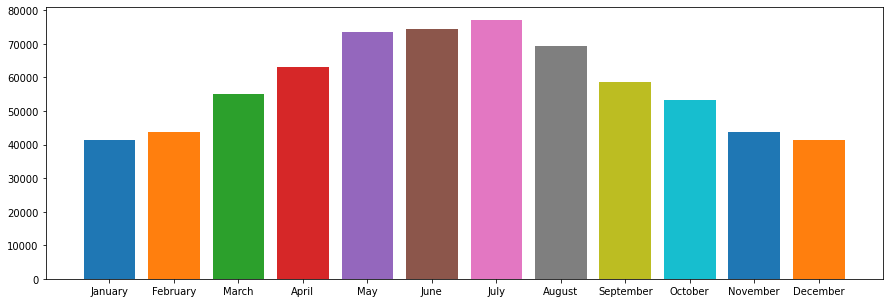

In [26]:
grpd = data.groupby(['month_name'])[['item_count']].sum()
grpd = grpd.loc[months].squeeze()
plt.figure(figsize = (15,5))
plt.bar(height = grpd.values, x = grpd.index, color = pal)
plt.show()

## Observe the distribution of sales across different quarters averaged over years. Do you find any pattern in sales there?


In [27]:
data['quarter'] = data.date.dt.quarter

In [28]:
data

,date,item_id,price,item_count,store_id,item_name,kcal,restaurant_name,weekday,month_name,quarter
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,Tuesday,January,1
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,Tuesday,January,1
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,Tuesday,January,1
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,Tuesday,January,1
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,Tuesday,January,1
...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,49,1.39,0.0,3,Awesome Smoothy,78,Sweet Shack,Friday,December,4
109596,2021-12-31,52,5.68,0.0,3,Original Sweet Milky Soft Drink,535,Sweet Shack,Friday,December,4
109597,2021-12-31,77,7.70,0.0,3,Blue Ribbon Frozen Milky Cake,636,Sweet Shack,Friday,December,4
109598,2021-12-31,81,5.11,0.0,3,Fantastic Milky Smoothy,383,Sweet Shack,Friday,December,4


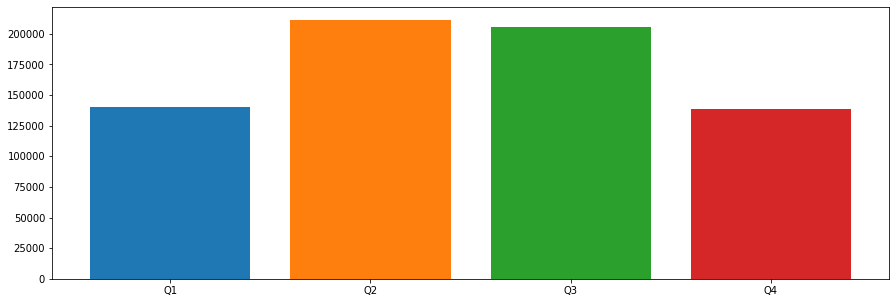

In [29]:
grpd = data.groupby(['quarter'])[['item_count']].sum().squeeze()
plt.figure(figsize = (15,5))
plt.bar(height = grpd.values, x = grpd.index, color = pal)
plt.xticks(range(1,5),["Q"+str(i) for i in range(1,5)])
plt.show()

In [30]:
data['year'] = data.date.dt.year

In [31]:
data['quart-year'] = "Q" + data.quarter.astype(str) + "-" + data.year.astype(str)

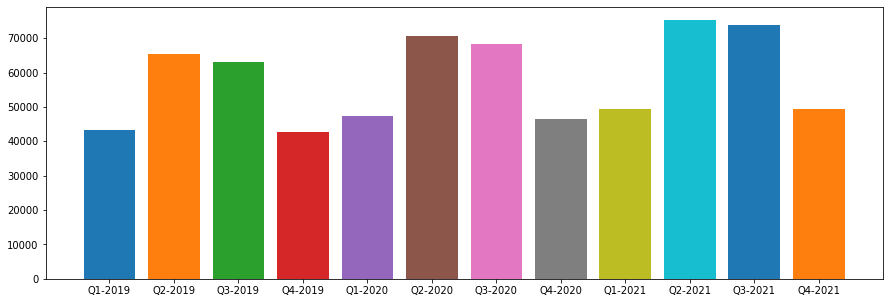

In [32]:
order = ['Q{}-{}'.format(j,i) for i in range(2019, 2022) for j in range(1,5)]
grpd = data.groupby(["quart-year"])[['item_count']].sum()
grpd = grpd.loc[order].squeeze()
plt.figure(figsize = (15,5))
plt.bar(height = grpd.values, x = grpd.index, color = pal)
plt.show()

## How are the different restaurants performing? Which restaurant had the most sales? Also study the sales for each restaurant across different years months and days.


In [33]:
data.groupby('store_id')[['item_count']].sum()

,item_count
store_id,
1,687527.0
2,1305.0
3,1736.0
4,1106.0
5,1310.0
6,1803.0


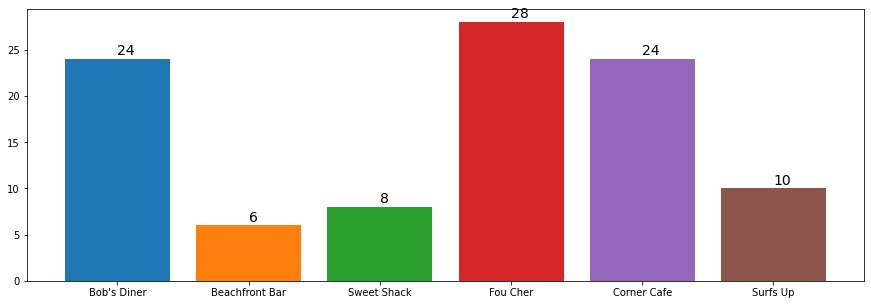

In [34]:
items_served = items.groupby(['store_id']).agg({'id' : "nunique"}).squeeze()
plt.figure(figsize = (15,5))
plt.bar(items_served.index, items_served.values, color = pal)
plt.xticks(range(1,7), restaurants.name)
for i in range(1,7):
  plt.annotate(items_served[i], xy = (i, items_served[i]+0.45), size = 14)

plt.show()

## restaurant level sales

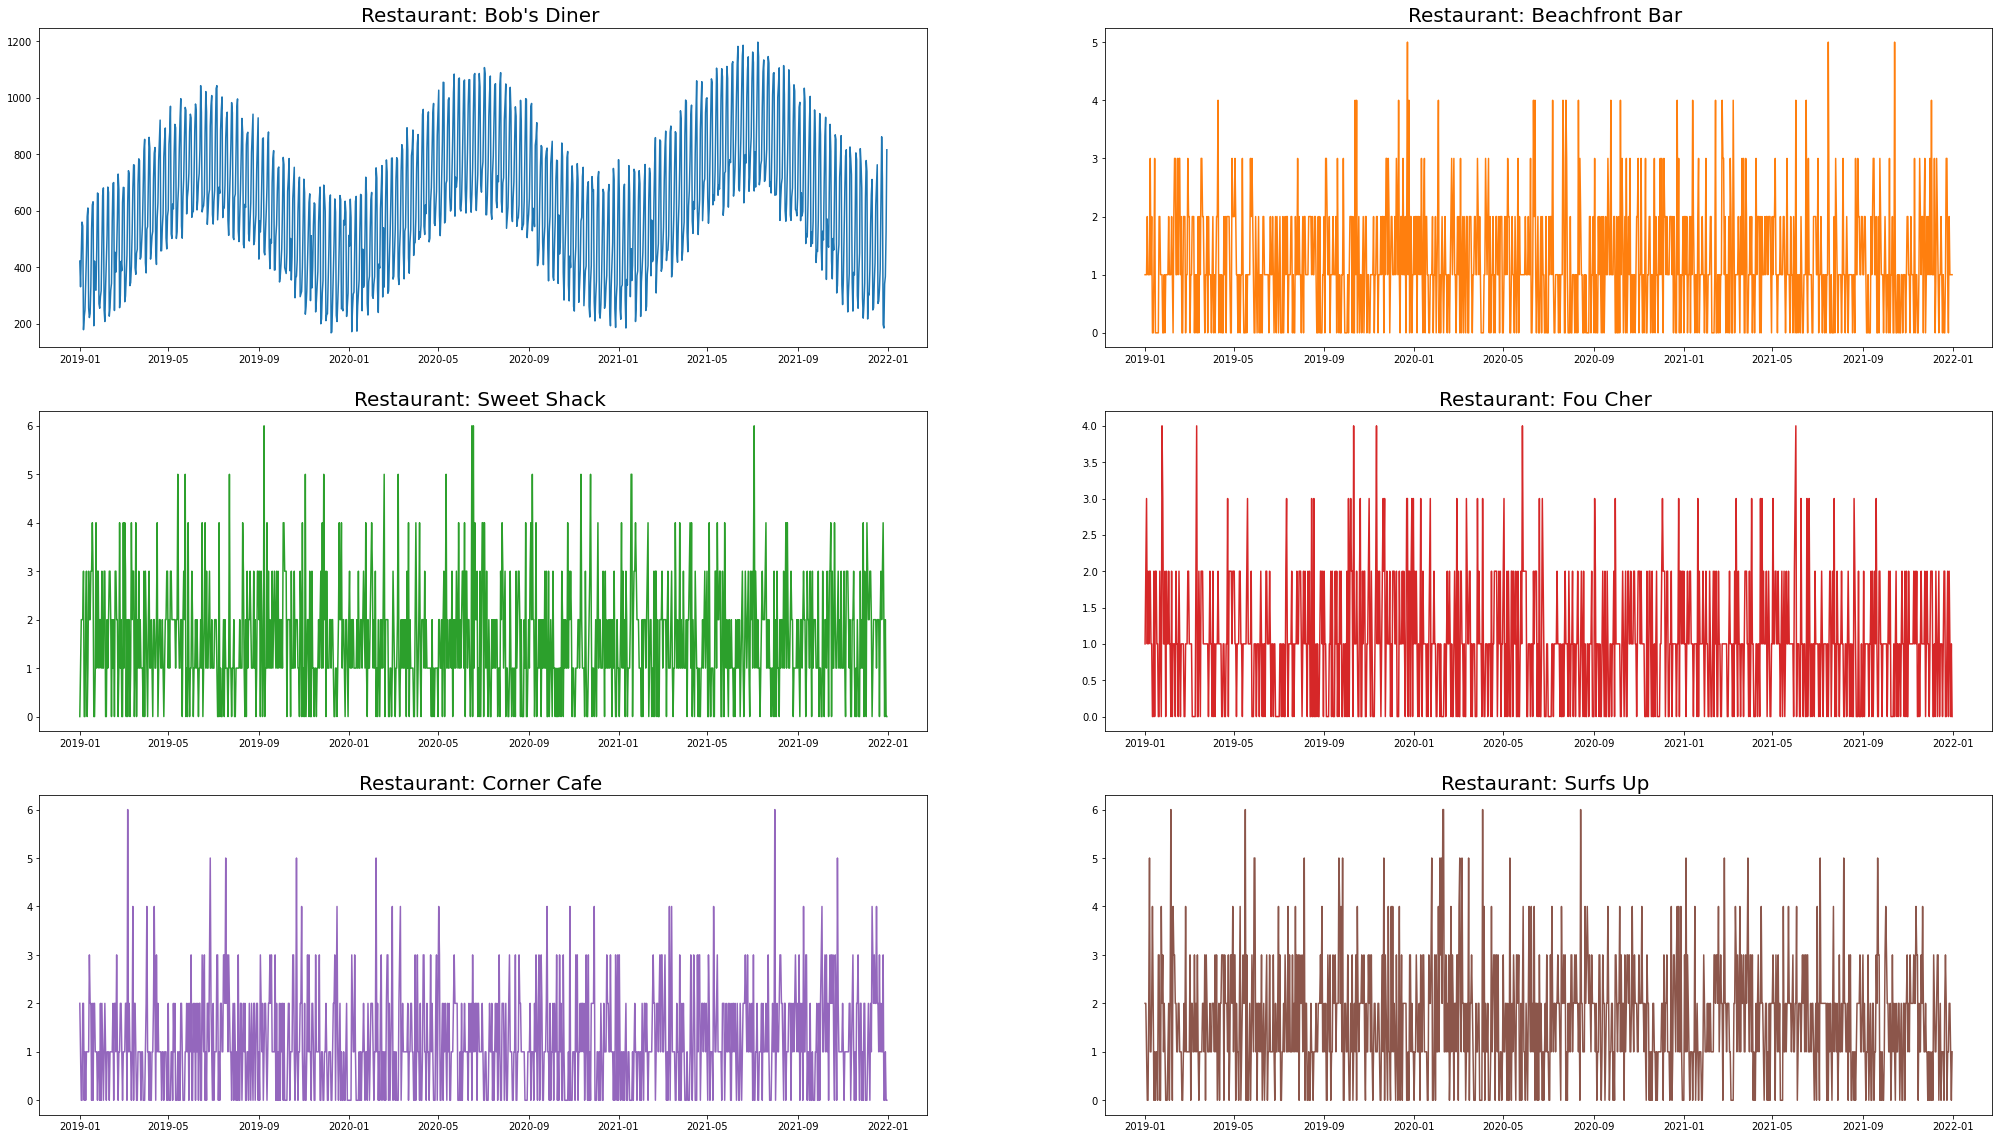

In [35]:
plot_data = data.pivot_table(index = 'date', columns = 'store_id',values = 'item_count', aggfunc = 'sum')
f,ax = plt.subplots(3,2,figsize =(35,20) )
r,c = 0,0
for i in range(1,7):
  ax[r,c].plot(plot_data.loc[:, i], color = pal_list[i-1])
  ax[r,c].set_title('Restaurant: {} '.format(restaurants.loc[restaurants.id == i, 'name'].values[0]), size = 20)
  c += 1
  if c == 2:
    c = 0
    r +=1


# year wise for each restaurant

In [36]:
plot_data = data.pivot_table(index = 'quart-year', columns = 'store_id',values = 'item_count', aggfunc = 'sum')


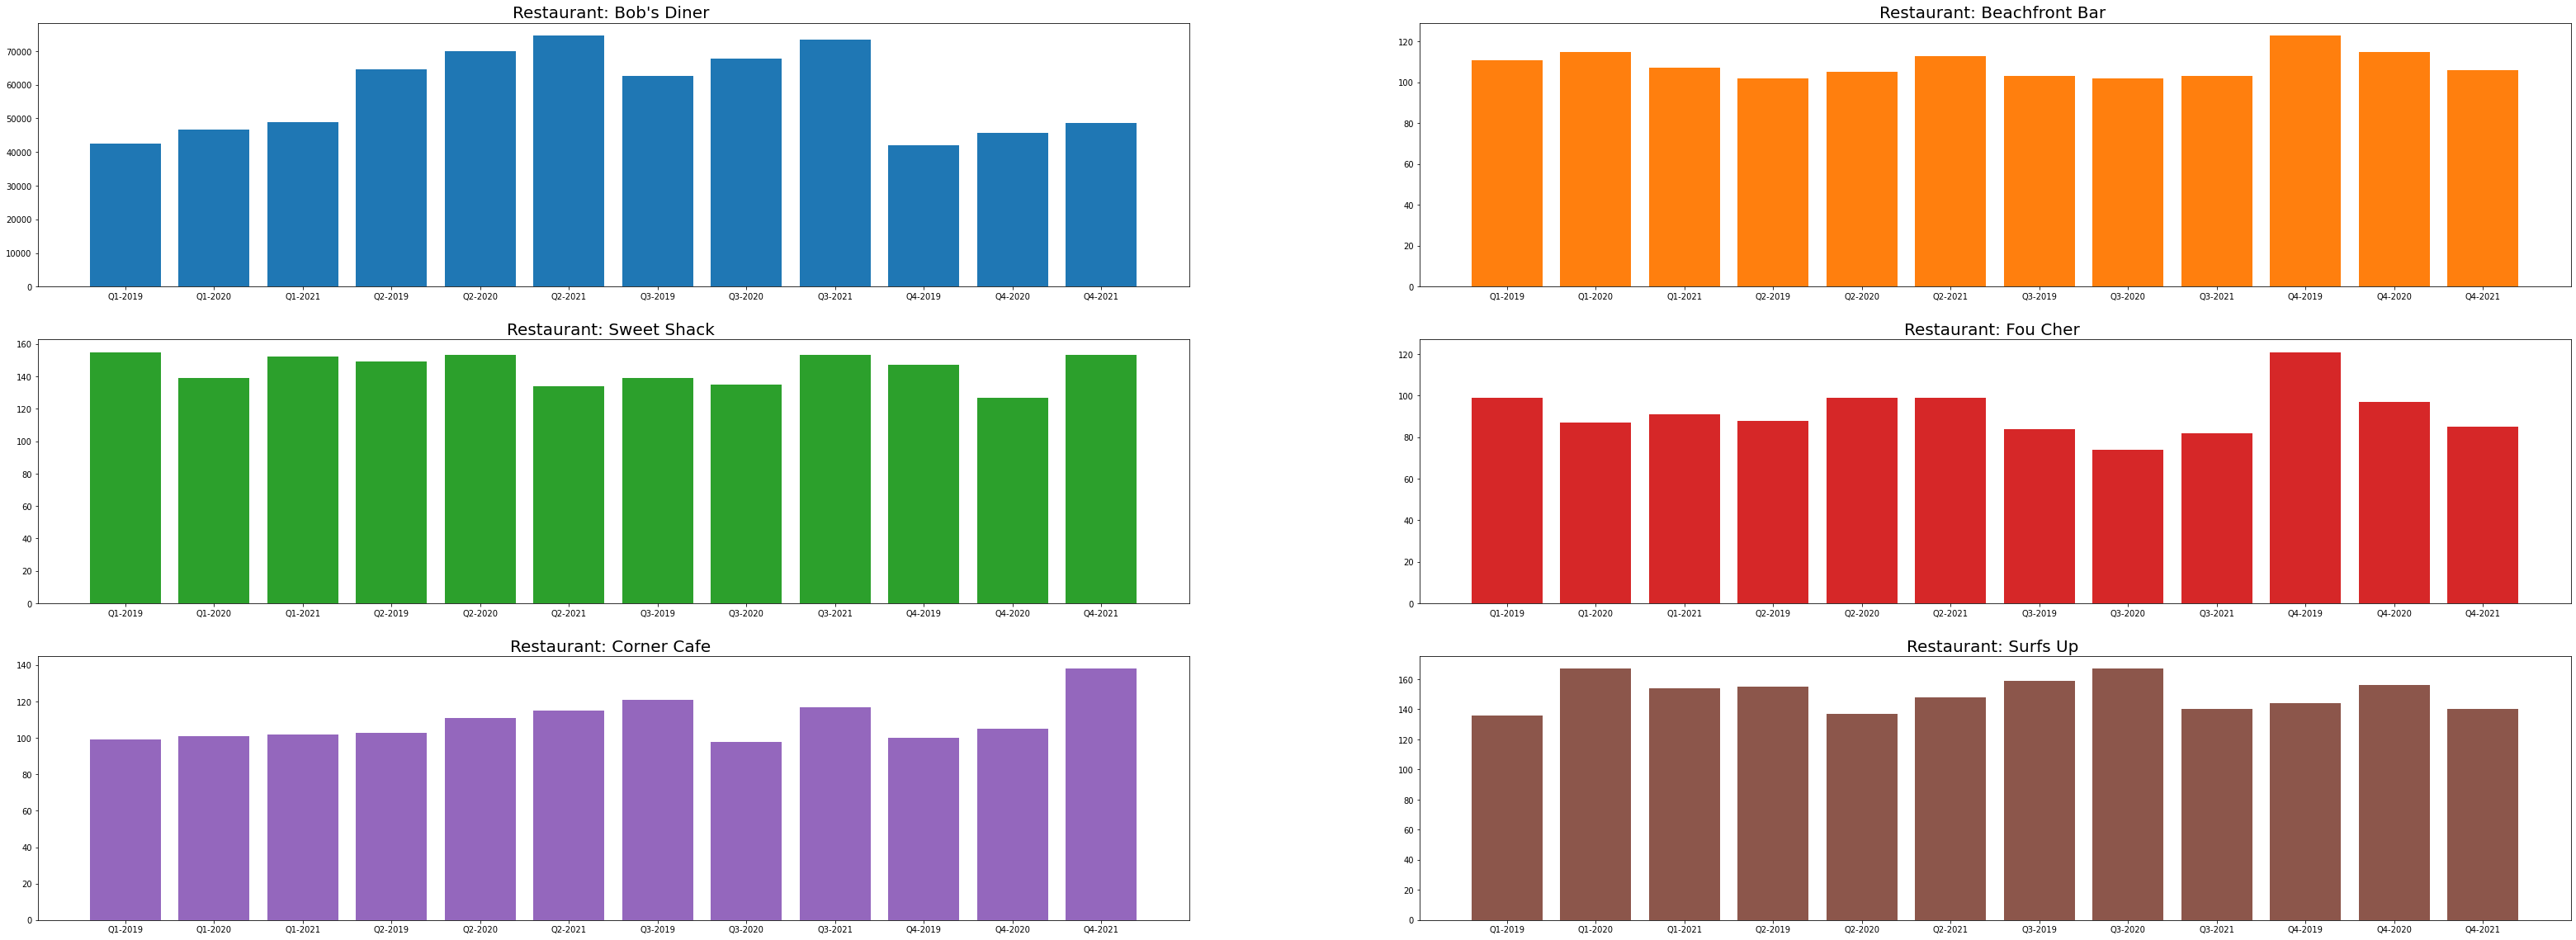

In [37]:
plot_data = data.pivot_table(index = 'quart-year', columns = 'store_id',values = 'item_count', aggfunc = 'sum')
f,ax = plt.subplots(3,2,figsize =(55,20) )
r,c = 0,0
for i in range(1,7):
  ax[r,c].bar(x = plot_data.index,height = plot_data.loc[:, i], color = pal_list[i-1])
  ax[r,c].set_title('Restaurant: {} '.format(restaurants.loc[restaurants.id == i, 'name'].values[0]), size = 20)
  c += 1
  if c == 2:
    c = 0
    r +=1


/tmp/ipykernel_188/2619853384.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = months, fontsize = 20)
/tmp/ipykernel_188/2619853384.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = months, fontsize = 20)
/tmp/ipykernel_188/2619853384.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = months, fontsize = 20)
/tmp/ipykernel_188/2619853384.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = months, fontsize = 20)
/tmp/ipykernel_188/2619853384.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = months, fontsize = 20)
/tmp/ipykernel_188/2619853384.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = months, f

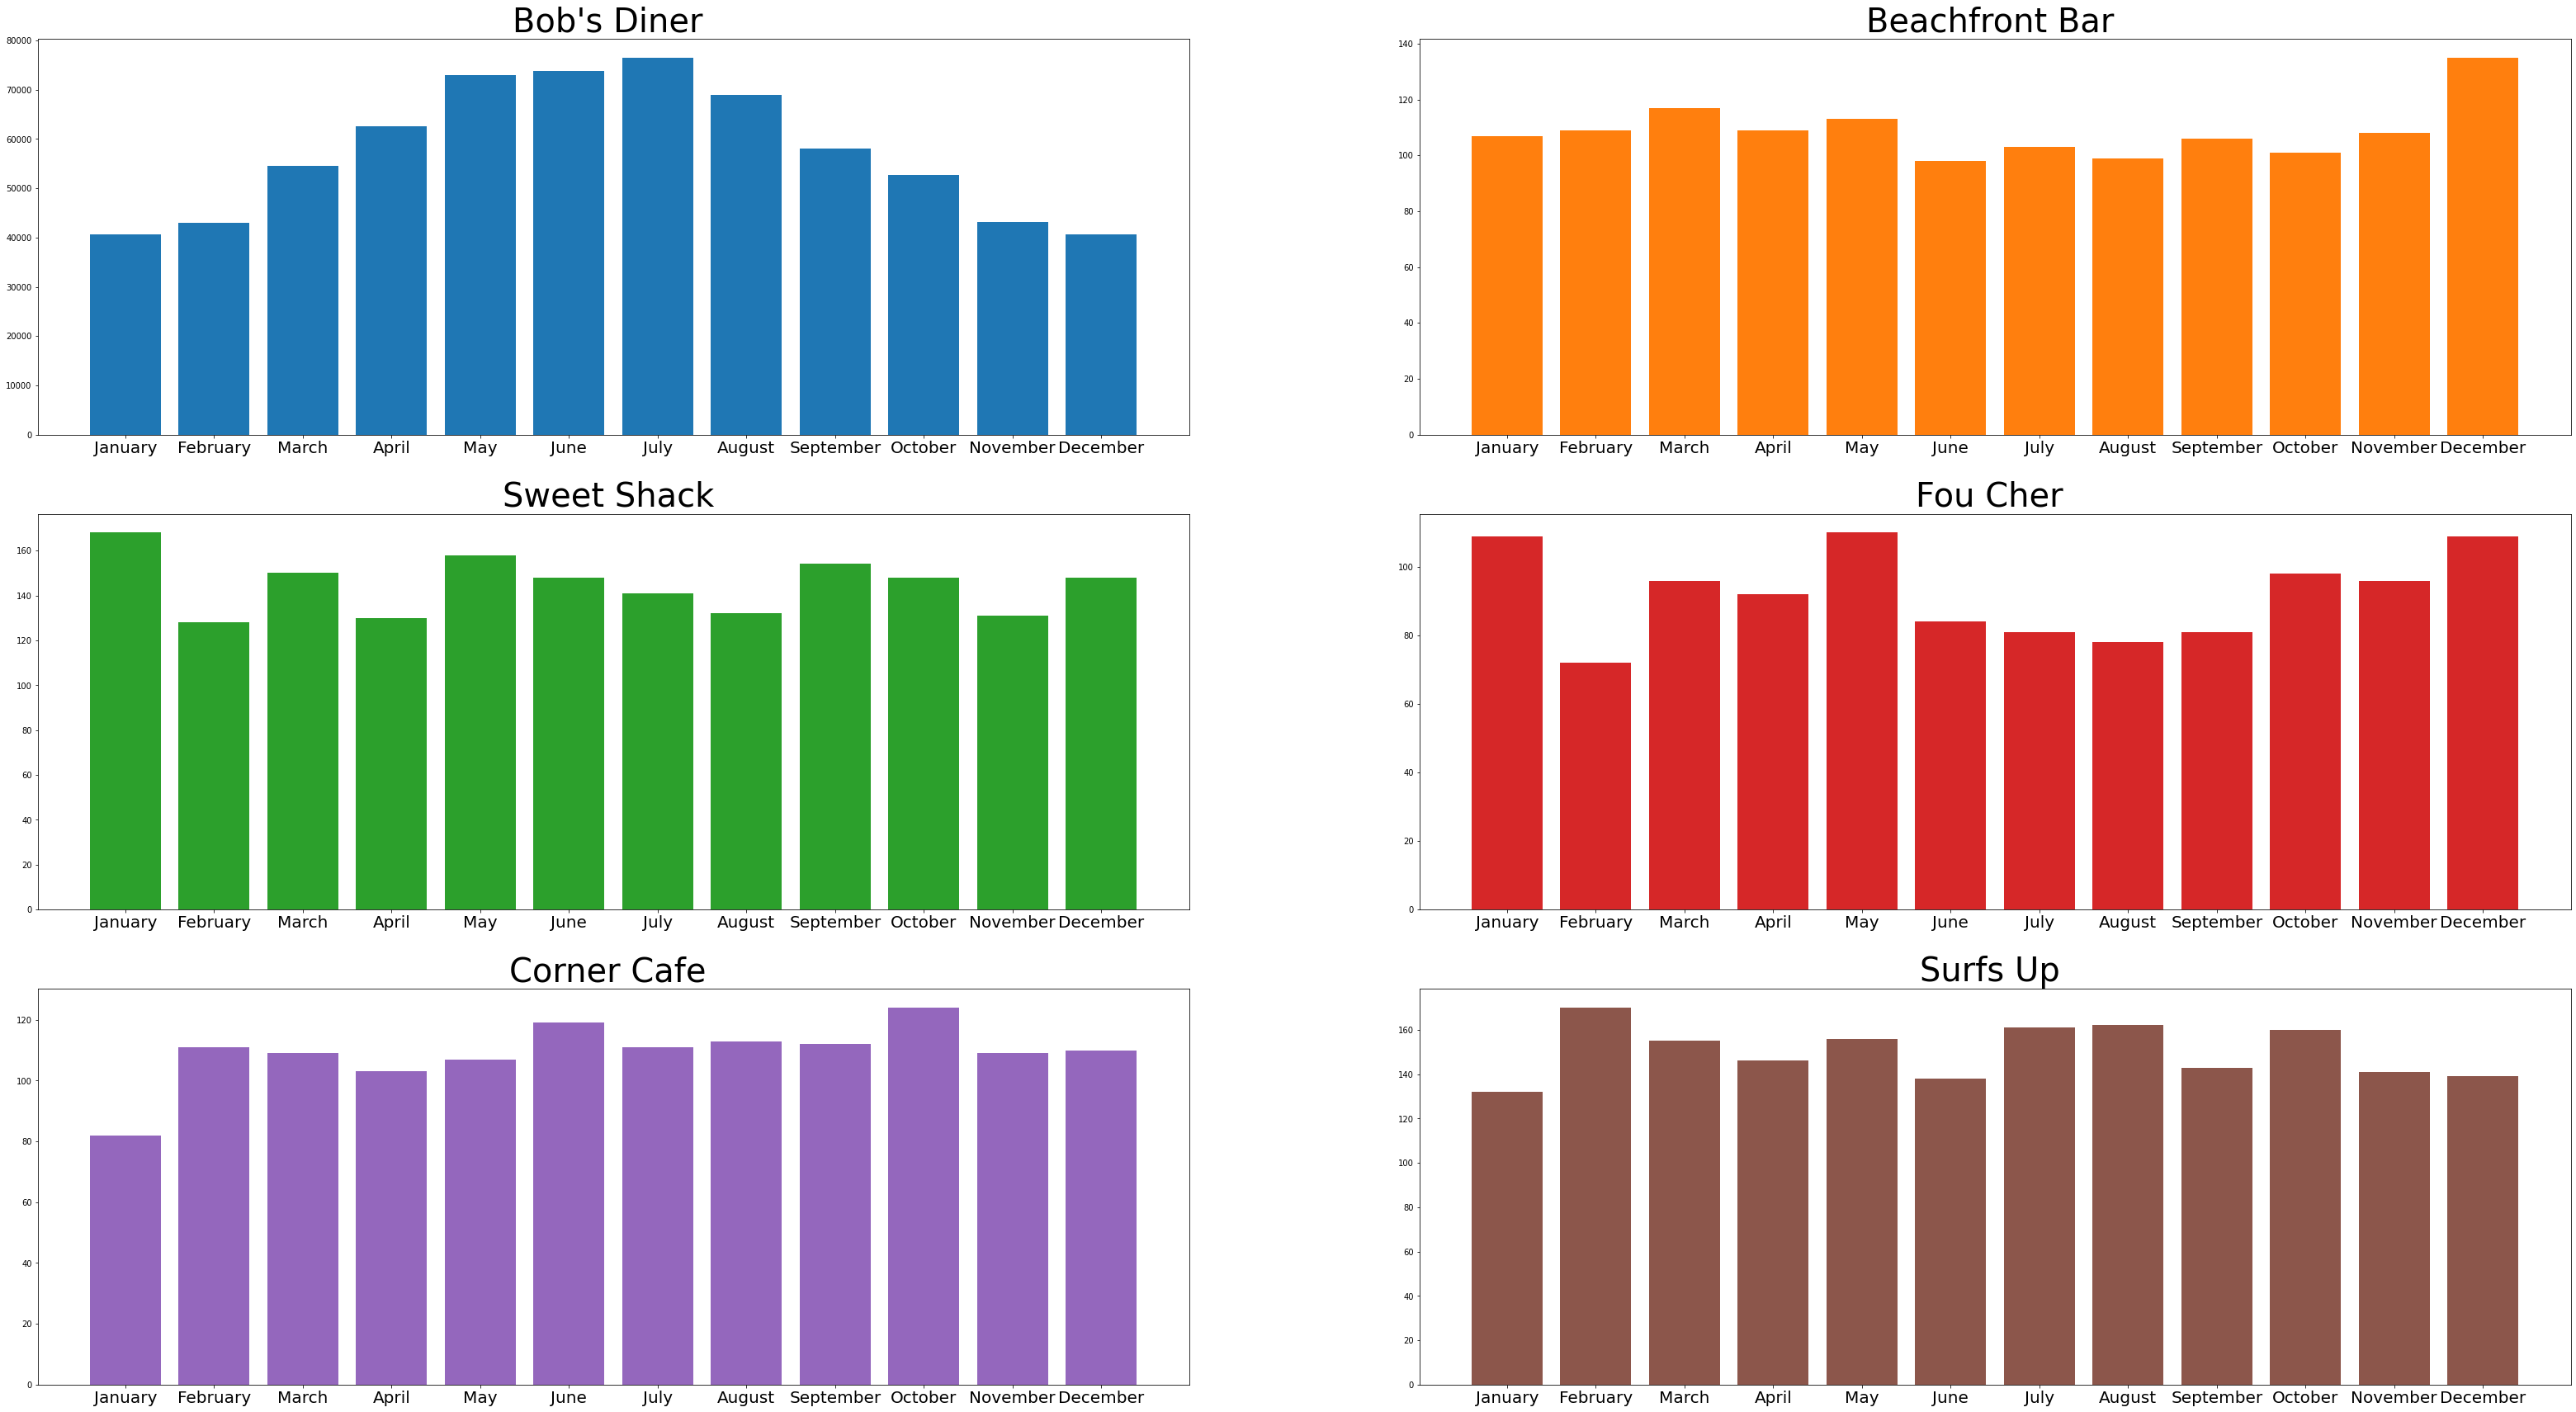

In [38]:
plot_data = data.pivot_table(index = 'month_name', columns = 'store_id',values = 'item_count', aggfunc = 'sum')
plot_data = plot_data.loc[months]
f,ax = plt.subplots(3,2,figsize =(55,30) )
r,c = 0,0
for i in range(1,7):
  ax[r,c].bar(x = plot_data.index,height = plot_data.loc[:, i], color = pal_list[i-1])
  ax[r,c].set_title('{} '.format(restaurants.loc[restaurants.id == i, 'name'].values[0]), size = 40)
  ax[r,c].set_xticklabels(labels = months, fontsize = 20)
  c += 1
  if c == 2:
    c = 0
    r +=1

/tmp/ipykernel_188/3239954549.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = day_names, fontsize = 20)
/tmp/ipykernel_188/3239954549.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = day_names, fontsize = 20)
/tmp/ipykernel_188/3239954549.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = day_names, fontsize = 20)
/tmp/ipykernel_188/3239954549.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = day_names, fontsize = 20)
/tmp/ipykernel_188/3239954549.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(labels = day_names, fontsize = 20)
/tmp/ipykernel_188/3239954549.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[r,c].set_xticklabels(lab

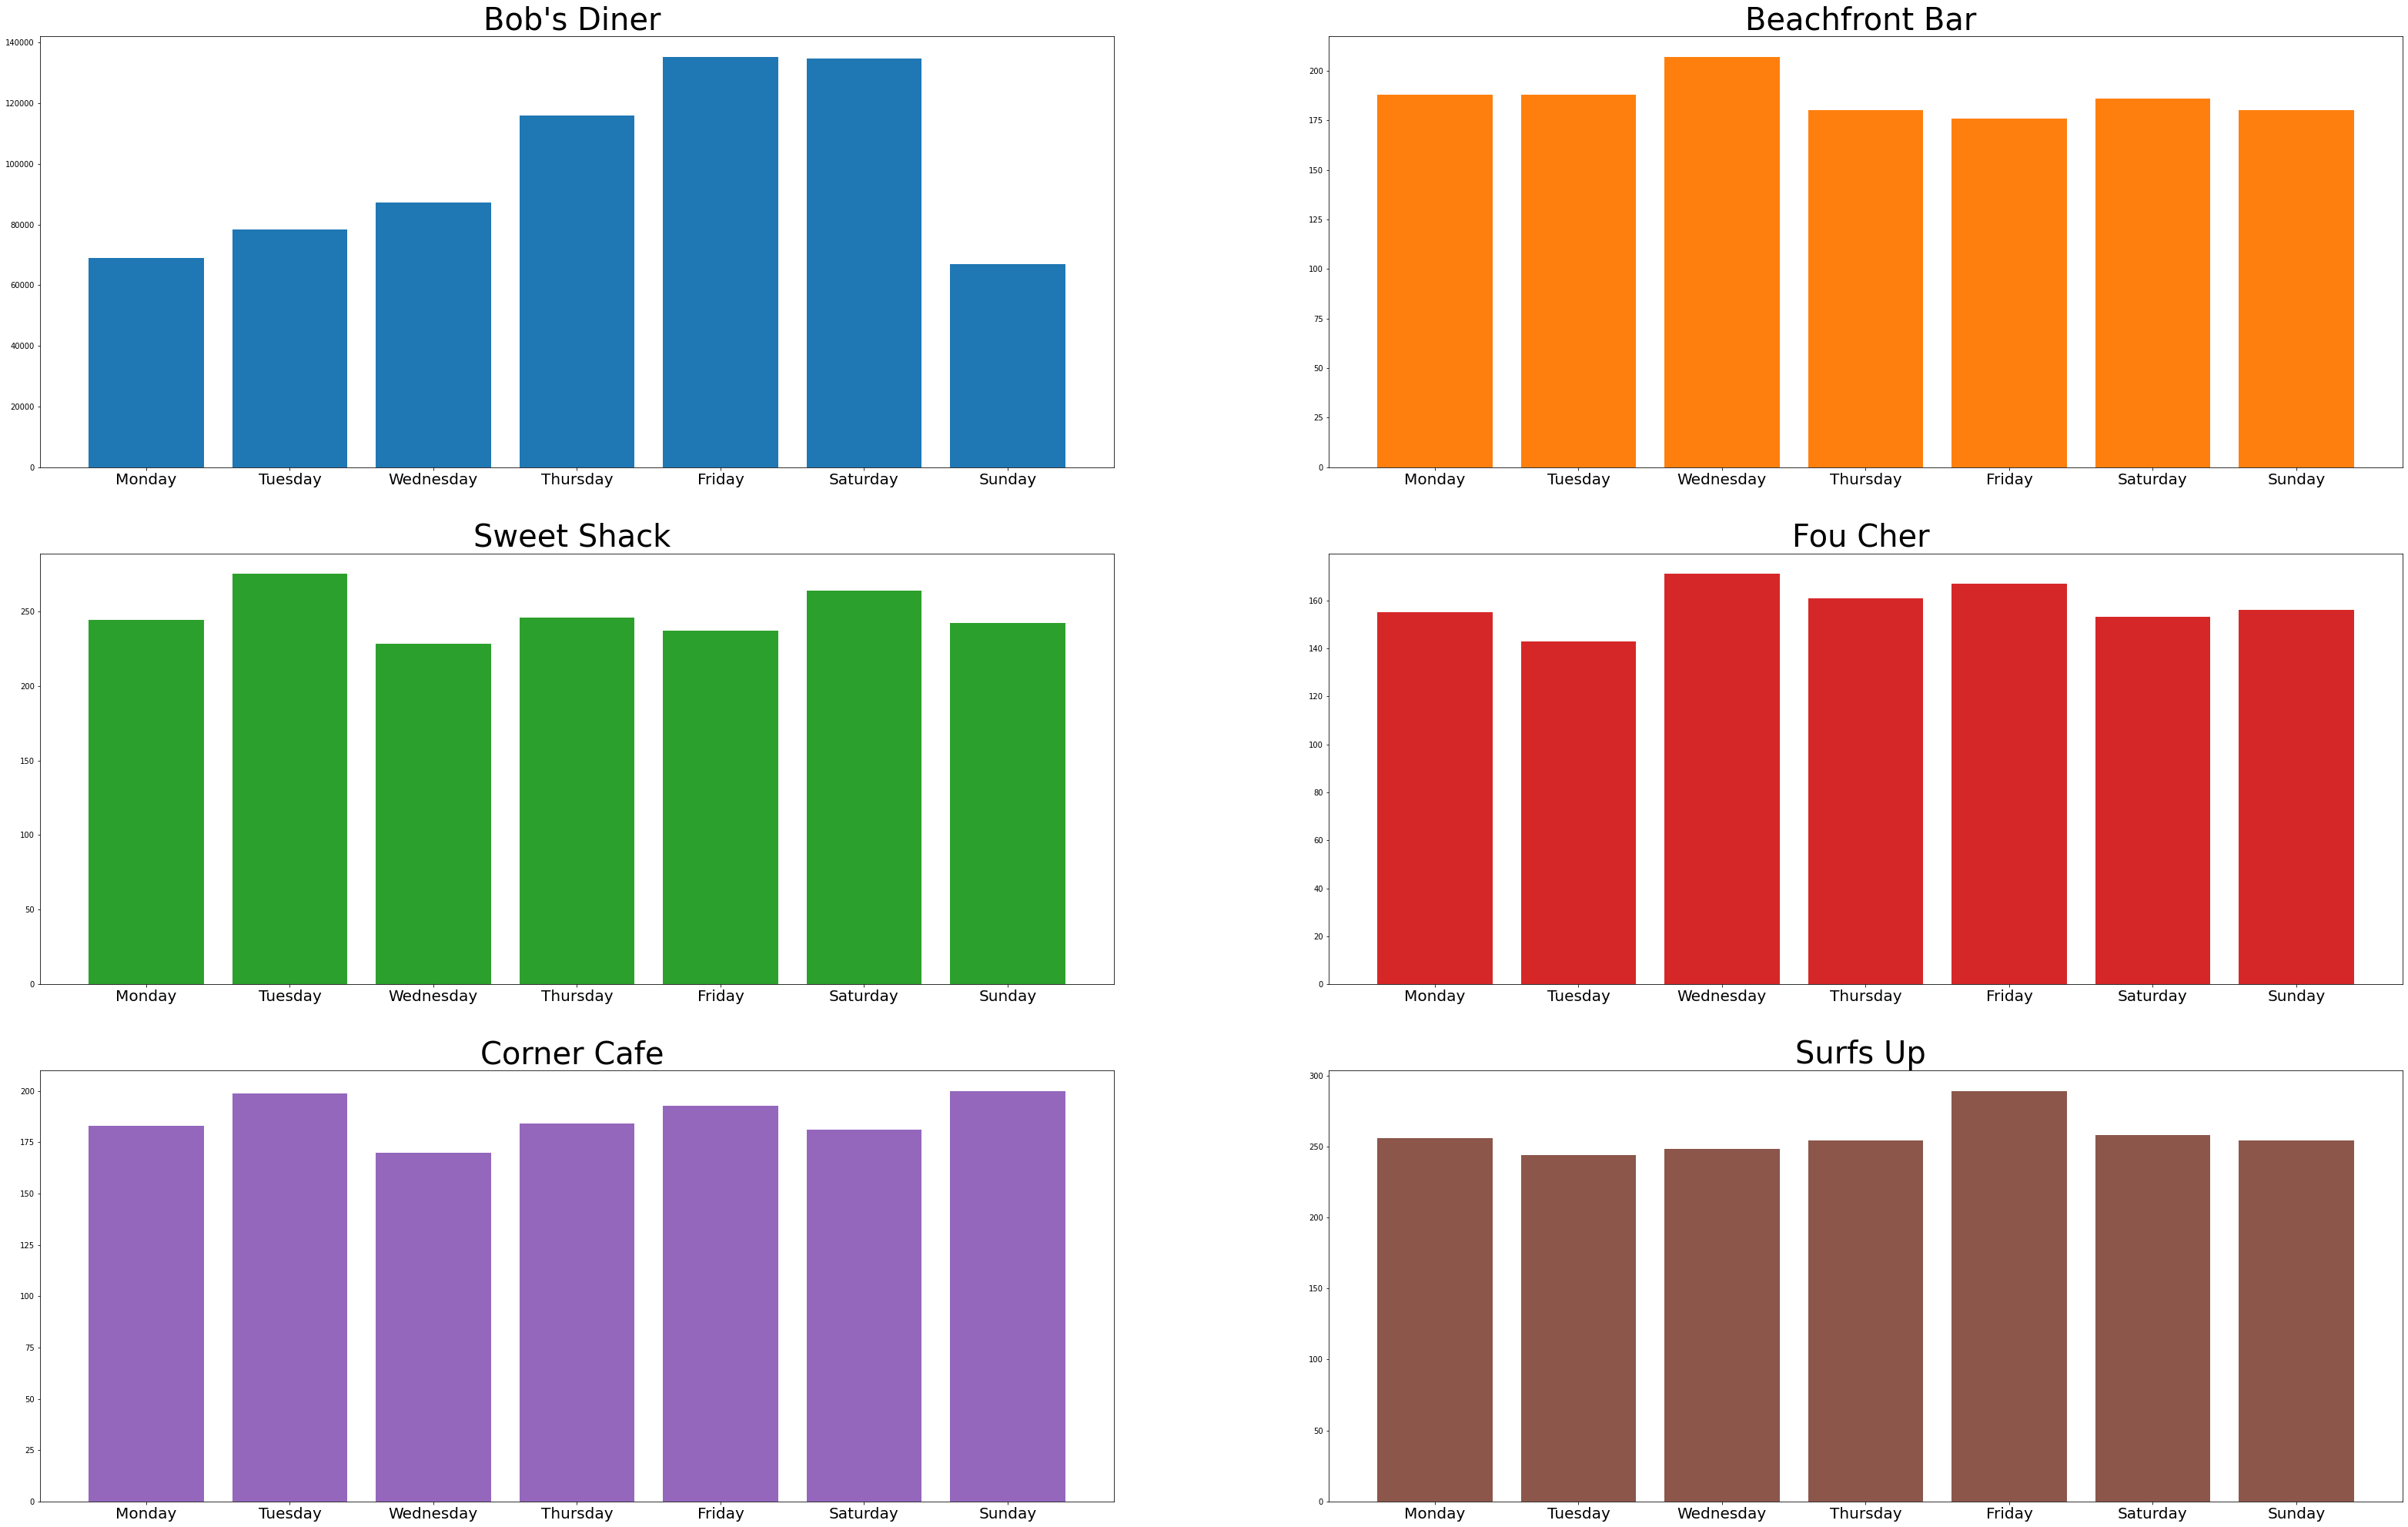

In [39]:
plot_data = data.pivot_table(index = 'weekday', columns = 'store_id',values = 'item_count', aggfunc = 'sum')
plot_data = plot_data.loc[day_names]
f,ax = plt.subplots(3,2,figsize =(55,35) )
r,c = 0,0
for i in range(1,7):
  ax[r,c].bar(x = plot_data.index,height = plot_data.loc[:, i], color = pal_list[i-1])
  ax[r,c].set_title('{} '.format(restaurants.loc[restaurants.id == i, 'name'].values[0]), size = 40)
  ax[r,c].set_xticklabels(labels = day_names, fontsize = 20)
  c += 1
  if c == 2:
    c = 0
    r +=1
plt.show()

# Which are the most popular items (overall) and at which restaurant are they being sold? Also, find out the most popular item at each restaurant


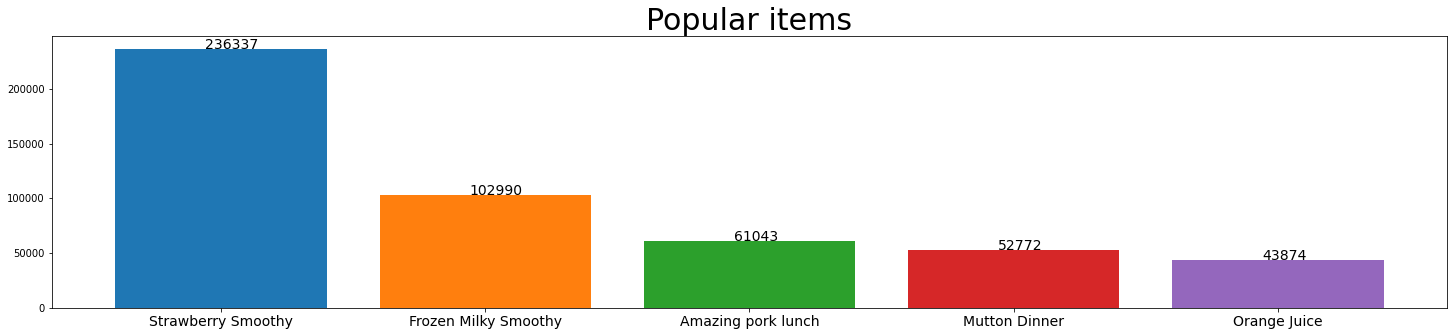

In [40]:
plot_data = data.groupby('item_id')[['item_count']].sum().sort_values('item_count',ascending = False).reset_index()[:5]
final_plot_data = pd.merge(plot_data, items, left_on = 'item_id', right_on = 'id', how = 'left')[['item_id', 'item_count', 'name', 'kcal', 'cost', 'store_id']]
plt.figure(figsize = (25,5))
plt.bar(final_plot_data.name, final_plot_data.item_count, color = pal_list)
plt.title('Popular items', size= 30)
for k in range(5):
  val = final_plot_data.loc[k,'item_count']
  plt.annotate('{:0.0f}'.format(val), xy = (k-0.06, val), size = 14)
plt.xticks(size = 14)
plt.show()

In [41]:
count_data = data.pivot_table(index = 'item_id', columns = 'store_id',values = 'item_count', aggfunc = 'sum', fill_value = 0 )
item_ids = count_data.index[count_data.values.argmax(axis = 0)]


## popular items restaurant wise

In [42]:
pop_items = items.loc[items.id.isin(item_ids), ['store_id', 'id', 'name', 'kcal', 'cost']]
pop_data = pd.merge(pop_items, restaurants, how = 'left', left_on = 'store_id', right_on = 'id', suffixes = ('_item', '_restaurant'))
pop_data['count'] = count_data.loc[item_ids,].sum(axis = 0).reset_index().iloc[:,1]
pop_data = pop_data[['name_restaurant', 'name_item', 'kcal', 'cost', 'count']]
pop_data

,name_restaurant,name_item,kcal,cost,count
0,Bob's Diner,Strawberry Smoothy,145,2.89,236337
1,Beachfront Bar,Fantastic Milky Smoothy,318,2.91,1147
2,Sweet Shack,Awesome Smoothy,78,1.39,1692
3,Corner Cafe,Frozen Milky Smoothy,211,3.98,298
4,Fou Cher,Blue Ribbon Fruity Vegi Lunch,881,53.98,273
5,Surfs Up,Awesome Soft Drink,248,3.06,997


# Is the store making the most sales in terms of count also making most money averaged for a day?


In [43]:
data.groupby('store_id')[['item_count']].sum().reset_index()

,store_id,item_count
0,1,687527.0
1,2,1305.0
2,3,1736.0
3,4,1106.0
4,5,1310.0
5,6,1803.0


In [44]:
data.pivot_table(index = 'store_id', columns = 'year', values = 'item_count', aggfunc = 'sum')

year,2019,2020,2021
store_id,,,
1,211799.0,230191.0,245537.0
2,439.0,437.0,429.0
3,590.0,554.0,592.0
4,392.0,357.0,357.0
5,423.0,415.0,472.0
6,594.0,627.0,582.0


In [45]:
data['sales_amnt'] = data.item_count * data.price

In [46]:
data.pivot_table(index = 'store_id', columns = 'year', values = 'sales_amnt', aggfunc = 'sum')

year,2019,2020,2021
store_id,,,
1,1849483.49,2112331.91,2375460.29
2,1281.85,1267.21,1247.14
3,872.59,828.65,877.03
4,9698.80,8590.87,9595.70
5,5292.93,5347.71,5910.79
6,5132.65,5314.43,5204.41


In [47]:
count_order = data.pivot_table(index = 'store_id',  values = 'sales_amnt', aggfunc = 'sum').squeeze()
count_order_rest = count_order.sort_values(ascending = False).index

In [48]:
sales_order = data.pivot_table(index = 'store_id',  values = 'item_count', aggfunc = 'sum').squeeze()
sales_order_rest = sales_order.sort_values(ascending = False).index

In [49]:
restaurants

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


## Restaurant id 1 - Bob's Diner has disproportionate amoujnts of data.  We will leave it out for this analysis to understand whether the number and sales values match for other restaurants.

In [50]:
count_order

store_id
1    6337275.69
2       3796.20
3       2578.27
4      27885.37
5      16551.43
6      15651.49
Name: sales_amnt, dtype: float64

In [51]:
restaurants.set_index('id').loc[count_order_rest]

,name
store_id,
1,Bob's Diner
4,Fou Cher
5,Corner Cafe
6,Surfs Up
2,Beachfront Bar
3,Sweet Shack


In [52]:
restaurants.set_index('id').loc[sales_order_rest]

,name
store_id,
1,Bob's Diner
6,Surfs Up
3,Sweet Shack
5,Corner Cafe
2,Beachfront Bar
4,Fou Cher


## Bob's Diner is highest grossing restaurant in numbers as well as sales value.
## However, Fou Cher which is second highest with respect to numbers of sales, but they make least amount of money out of the 6 restaurants

# Which are the costliest item at each of the restaurants and what are their calorie counts?

In [53]:
items.iloc[[items.cost.argmax()]]

,id,store_id,name,kcal,cost
79,80,4,Blue Ribbon Fruity Vegi Lunch,881,53.98


In [54]:
items.sort_values("cost",ascending = False)[:5]

,id,store_id,name,kcal,cost
79,80,4,Blue Ribbon Fruity Vegi Lunch,881,53.98
2,3,1,Sweet Fruity Cake,931,29.22
55,56,1,Sea Bass with Vegetables Dinner,613,28.75
96,97,4,Original Fruity Cod with Bread and Vegetables ...,744,28.65
33,34,4,Sweet Savory Cake,721,27.47


##  max and min cost of items sold at each restaurant

In [55]:
items.groupby('store_id')[['cost']].agg(['max', 'min', 'mean'])

cost                 
            max   min       mean
store_id                        
1         29.22  2.89  12.211667
2          5.70  2.43   3.585000
3          7.70  1.39   5.276250
4         53.98  3.23  12.819643
5         26.37  3.74  13.371667
6         26.21  3.06  13.970000

## Develop a linear regression, random forest and XGBoost model to predict for the model with the given data. Compare and comment on the results obtained.
- Create required features for development of these models like day of the week, quarter of the year, month, year, day of the month etc.
- Use the last six months data as test data.
- Compute the RMSE values for each of the models to compare their performances.
- Also use these models to forecast for 1 year.


In [56]:
data.date.describe()

/tmp/ipykernel_188/3984613233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                  109600
unique                   1096
top       2019-01-01 00:00:00
freq                      100
first     2019-01-01 00:00:00
last      2021-12-31 00:00:00
Name: date, dtype: object

In [57]:
ts = data.groupby('date')[['item_count']].sum().squeeze()


In [58]:
data.head()

,date,item_id,price,item_count,store_id,item_name,kcal,restaurant_name,weekday,month_name,quarter,year,quart-year,sales_amnt
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931,Bob's Diner,Tuesday,January,1,2019,Q1-2019,58.44
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763,Bob's Diner,Tuesday,January,1,2019,Q1-2019,581.24
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478,Bob's Diner,Tuesday,January,1,2019,Q1-2019,34.09
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490,Bob's Diner,Tuesday,January,1,2019,Q1-2019,50.16
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284,Bob's Diner,Tuesday,January,1,2019,Q1-2019,436.56


In [59]:
time_series = data.groupby(['date']).agg({'item_count':'sum', 'weekday': lambda x :x.unique()[0],
                            'quarter' : lambda x :x.unique()[0], 'year': lambda x :x.unique()[0],
                            'month_name' : lambda x :x.unique()[0],
                            'year':lambda x :x.unique()[0]})

# adding some more features : day of the year, day of the month and week of the year

In [60]:
time_series['day_year'] = time_series.index.day_of_year
time_series['day_month'] = time_series.index.day
time_series['week_num'] = time_series.index.isocalendar().week.astype(int)
time_series

,item_count,weekday,quarter,year,month_name,day_year,day_month,week_num
date,,,,,,,,
2019-01-01,427.0,Tuesday,1,2019,January,1,1,1
2019-01-02,337.0,Wednesday,1,2019,January,2,2,1
2019-01-03,445.0,Thursday,1,2019,January,3,3,1
2019-01-04,564.0,Friday,1,2019,January,4,4,1
2019-01-05,552.0,Saturday,1,2019,January,5,5,1
...,...,...,...,...,...,...,...,...
2021-12-27,192.0,Monday,4,2021,December,361,27,52
2021-12-28,344.0,Tuesday,4,2021,December,362,28,52
2021-12-29,371.0,Wednesday,4,2021,December,363,29,52


## convert the categorical to numeric using ordinal encoder. The input data is ordered in terms of weekday and month name.

In [61]:
from sklearn.preprocessing import OrdinalEncoder

In [62]:
day_names

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [63]:
ord_enc = OrdinalEncoder(categories = [months, day_names])
ord_enc.fit(time_series[['month_name', 'weekday']])
time_series[['month_name', 'weekday']] = ord_enc.transform(time_series[['month_name', 'weekday']])

In [64]:
time_series

,item_count,weekday,quarter,year,month_name,day_year,day_month,week_num
date,,,,,,,,
2019-01-01,427.0,1.0,1,2019,0.0,1,1,1
2019-01-02,337.0,2.0,1,2019,0.0,2,2,1
2019-01-03,445.0,3.0,1,2019,0.0,3,3,1
2019-01-04,564.0,4.0,1,2019,0.0,4,4,1
2019-01-05,552.0,5.0,1,2019,0.0,5,5,1
...,...,...,...,...,...,...,...,...
2021-12-27,192.0,0.0,4,2021,11.0,361,27,52
2021-12-28,344.0,1.0,4,2021,11.0,362,28,52
2021-12-29,371.0,2.0,4,2021,11.0,363,29,52


## Train Test Split

In [65]:
train = time_series[time_series.index < '2021-07-01']
test = time_series[time_series.index >= '2021-07-01']

In [66]:
y_var = 'item_count'
x_vars = time_series.drop(columns = 'item_count').columns

In [67]:
X_train = train[x_vars]
Y_train = train[y_var]
X_test = test[x_vars]
Y_test = test[y_var]

## Linear Regression

In [68]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [69]:
test['lr_pred'] = lr.predict(X_test)

/tmp/ipykernel_188/3421247276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lr_pred'] = lr.predict(X_test)


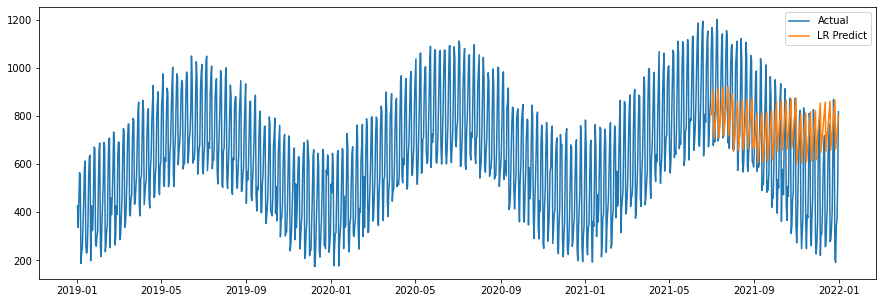

In [70]:
plt.figure(figsize = (15,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.lr_pred, label = "LR Predict")
plt.legend()
plt.show()

In [71]:
lr_rmse = mean_squared_error(y_true = test.item_count, y_pred = test.lr_pred, squared = False)
lr_mae = mean_absolute_error(y_true = test.item_count, y_pred = test.lr_pred)
lr_r2_score = r2_score(y_true = test.item_count, y_pred = test.lr_pred)
print("Linear Regression :\nRMSE : {:.2f}\nMAE : {:.2f}\nR2_Score : {:.2f}".format(lr_rmse,lr_mae,lr_r2_score*100))

Linear Regression :
RMSE : 244.21
MAE : 196.04
R2_Score : 7.65


In [72]:
results = pd.DataFrame([lr_rmse, lr_mae,lr_r2_score*100], index = ['RMSE', 'MAE', 'R2_Score'], columns = ['Linear Regression']).round(2)
results

,Linear Regression
RMSE,244.21
MAE,196.04
R2_Score,7.65


# Random Forest

In [73]:
rf = RandomForestRegressor(n_estimators=100, max_depth=20)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=20)

In [74]:
test['rf_pred'] = rf.predict(X_test)

/tmp/ipykernel_188/582745053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rf_pred'] = rf.predict(X_test)


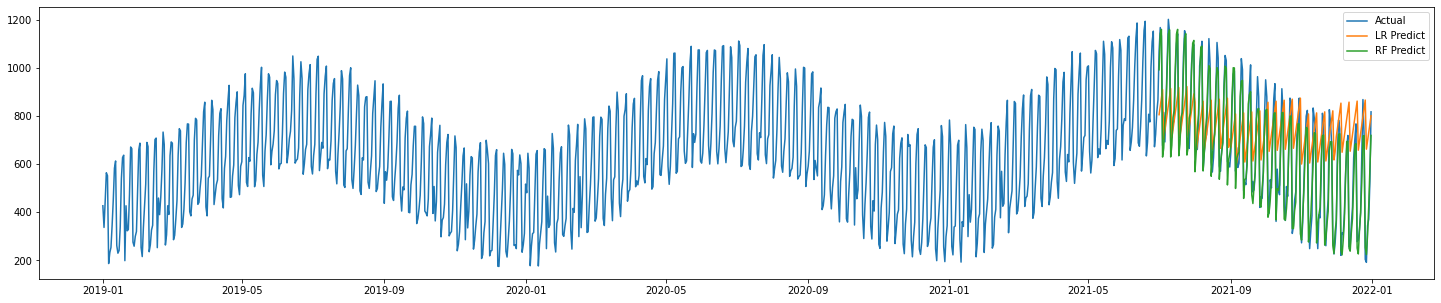

In [75]:
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.lr_pred, label = "LR Predict")
plt.plot(test.rf_pred, label = "RF Predict")
plt.legend()
plt.show()

In [76]:
rf_rmse = mean_squared_error(y_true = test.item_count, y_pred = test.rf_pred, squared = False)
rf_mae = mean_absolute_error(y_true = test.item_count, y_pred = test.rf_pred)
rf_r2_score = r2_score(y_true = test.item_count, y_pred = test.rf_pred)
print("Random Forest Regression :\nRMSE : {:.2f}\nMAE : {:.2f}\nR2_Score : {:.2f}".format(rf_rmse,rf_mae,rf_r2_score*100))

Random Forest Regression :
RMSE : 60.06
MAE : 47.43
R2_Score : 94.41


In [77]:
results['Random Forest'] = [rf_rmse,rf_mae,rf_r2_score*100]
results.round(2)

,Linear Regression,Random Forest
RMSE,244.21,60.06
MAE,196.04,47.43
R2_Score,7.65,94.41


## XGBoost

In [78]:
xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
xgb.fit(X_train, Y_train,
        eval_set=[(X_train, Y_train), (X_test, Y_test)],
        verbose=100)

[13:05:25] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:660.07703	validation_1-rmse:709.00433
[100]	validation_0-rmse:262.47899	validation_1-rmse:311.50595
[200]	validation_0-rmse:121.29383	validation_1-rmse:170.69070
[300]	validation_0-rmse:71.46305	validation_1-rmse:106.04091
[400]	validation_0-rmse:52.24712	validation_1-rmse:78.99977
[500]	validation_0-rmse:43.94530	validation_1-rmse:72.72422
[585]	validation_0-rmse:40.37786	validation_1-rmse:73.20545


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

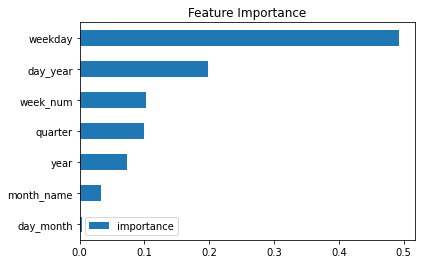

In [79]:
importance = pd.DataFrame(data=xgb.feature_importances_,
             index=xgb.get_booster().feature_names,
             columns=['importance'])
importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [80]:
test['xgb_pred'] = xgb.predict(X_test)

/tmp/ipykernel_188/5488039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['xgb_pred'] = xgb.predict(X_test)


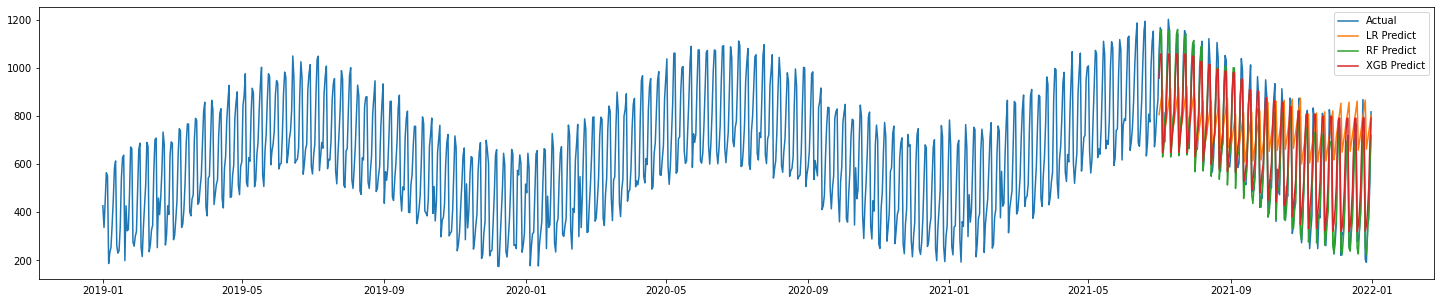

In [81]:
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.lr_pred, label = "LR Predict")
plt.plot(test.rf_pred, label = "RF Predict")
plt.plot(test.xgb_pred, label = "XGB Predict")
plt.legend()
plt.show()

In [82]:
xgb_rmse = mean_squared_error(y_true = test.item_count, y_pred = test.xgb_pred, squared = False)
xgb_mae = mean_absolute_error(y_true = test.item_count, y_pred = test.xgb_pred)
xgb_r2_score = r2_score(y_true = test.item_count, y_pred = test.xgb_pred)
print("XGBoost :\nRMSE : {:.2f}\nMAE : {:.2f}\nR2_Score : {:.2f}".format(xgb_rmse,xgb_mae,xgb_r2_score*100))

XGBoost :
RMSE : 72.30
MAE : 59.45
R2_Score : 91.90


In [83]:
results['XGBoost'] = [xgb_rmse,xgb_mae,xgb_r2_score*100]
results = results.round(2)

In [84]:
results

,Linear Regression,Random Forest,XGBoost
RMSE,244.21,60.06,72.30
MAE,196.04,47.43,59.45
R2_Score,7.65,94.41,91.90


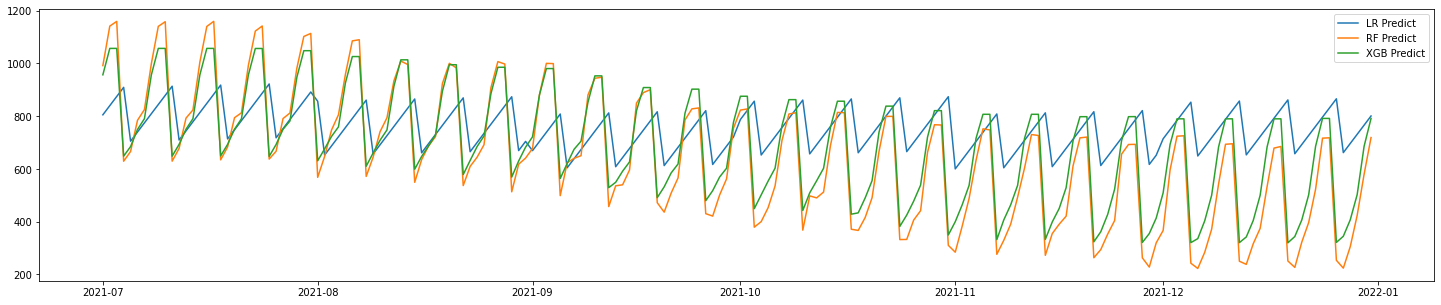

In [85]:
plt.figure(figsize = (25,5))
plt.plot(test.lr_pred, label = "LR Predict")
plt.plot(test.rf_pred, label = "RF Predict")
plt.plot(test.xgb_pred, label = "XGB Predict")
plt.legend()
plt.show()

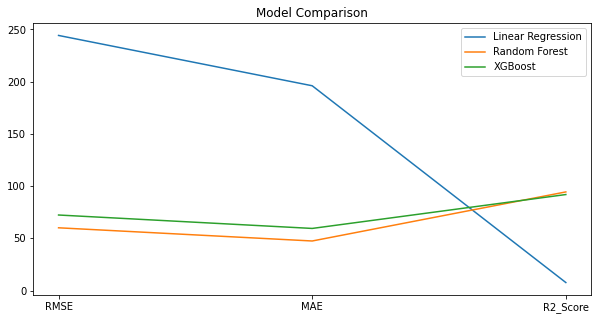

In [86]:
plt.figure(figsize = (10,5))
plt.plot(results['Linear Regression'], label = "Linear Regression")
plt.plot(results['Random Forest'], label = "Random Forest")
plt.plot(results['XGBoost'], label = "XGBoost")
plt.legend(loc = "upper right")
plt.title("Model Comparison")
plt.show()


In [87]:
results

,Linear Regression,Random Forest,XGBoost
RMSE,244.21,60.06,72.30
MAE,196.04,47.43,59.45
R2_Score,7.65,94.41,91.90


## The best model is Random Forest: We can use it to make predictions

In [88]:
time_series.index.max()

Timestamp('2021-12-31 00:00:00')

In [89]:
future_predictors = pd.DataFrame(pd.date_range(start="2022-01-01", end="2022-12-31"), columns=['date'])
future_predictors.index = pd.to_datetime(future_predictors.date)


In [90]:
X_train.columns

Index(['weekday', 'quarter', 'year', 'month_name', 'day_year', 'day_month',
       'week_num'],
      dtype='object')

In [91]:
future_predictors.date.dt.isocalendar().week

date
2022-01-01    52
2022-01-02    52
2022-01-03     1
2022-01-04     1
2022-01-05     1
              ..
2022-12-27    52
2022-12-28    52
2022-12-29    52
2022-12-30    52
2022-12-31    52
Name: week, Length: 365, dtype: UInt32

In [92]:
future_predictors['weekday'] = future_predictors.date.dt.day_name()
future_predictors['quarter'] = future_predictors.date.dt.quarter
future_predictors['year'] = future_predictors.date.dt.year
future_predictors['month_name'] = future_predictors.date.dt.month_name()
future_predictors['day_year'] = future_predictors.date.dt.day_of_year
future_predictors['day_month'] = future_predictors.date.dt.day
future_predictors['week_num'] = future_predictors.date.dt.isocalendar().week


In [93]:
future_predictors.head(2)

,date,weekday,quarter,year,month_name,day_year,day_month,week_num
date,,,,,,,,
2022-01-01,2022-01-01,Saturday,1,2022,January,1,1,52
2022-01-02,2022-01-02,Sunday,1,2022,January,2,2,52


In [94]:
future_predictors[['month_name', 'weekday']] = ord_enc.transform(future_predictors[['month_name', 'weekday']])

In [95]:
future_predictors['predictions'] = rf.predict(future_predictors[X_train.columns])

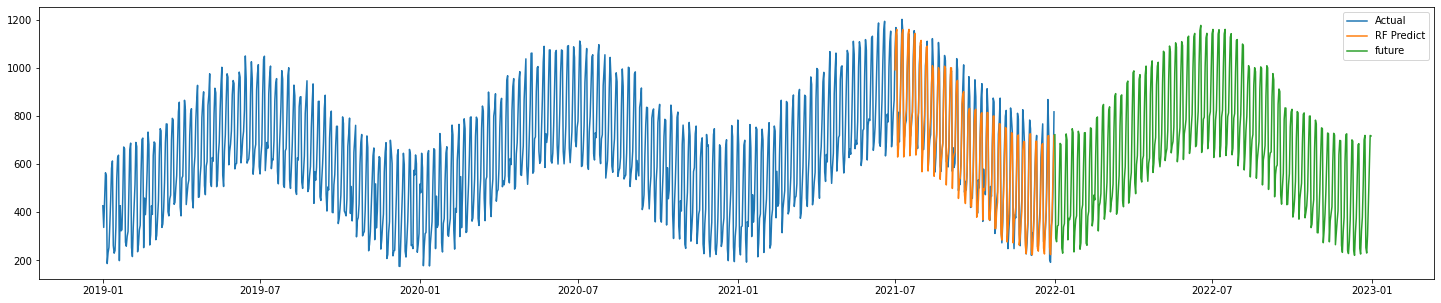

In [96]:
plt.figure(figsize = (25,5))
plt.plot(time_series.item_count, label = "Actual")
plt.plot(test.rf_pred, label = "RF Predict")
plt.plot(future_predictors.predictions, label = "future")
plt.legend()
plt.show()

# Time Series Modelling :
- Plot seasonality, trend, and irregular components over time for the sales data.
- Based on trend and seasonality, choose an appropriate exponential smoothing method to forecast using last six months of the data as validation set.
- Perform augmented Dickey-Fuller test (ADF) to check for stationarity for time series.
- Look at the ACF and PACF plots and strategize for ARIMA modeling. Find appropriate values of p, d and q and forecast for next 3 months. For model validation, find out MAPE of 3 months.


In [97]:
ts = time_series['item_count']

In [98]:
ts

date
2019-01-01    427.0
2019-01-02    337.0
2019-01-03    445.0
2019-01-04    564.0
2019-01-05    552.0
              ...  
2021-12-27    192.0
2021-12-28    344.0
2021-12-29    371.0
2021-12-30    527.0
2021-12-31    817.0
Name: item_count, Length: 1096, dtype: float64

In [99]:
train = ts[ts.index < '2021-07-01']
test = ts[ts.index >= '2021-07-01']

In [100]:
decompose = seasonal_decompose(train)

In [101]:
trend = decompose.trend
seasonality = decompose.seasonal
resid = decompose.resid

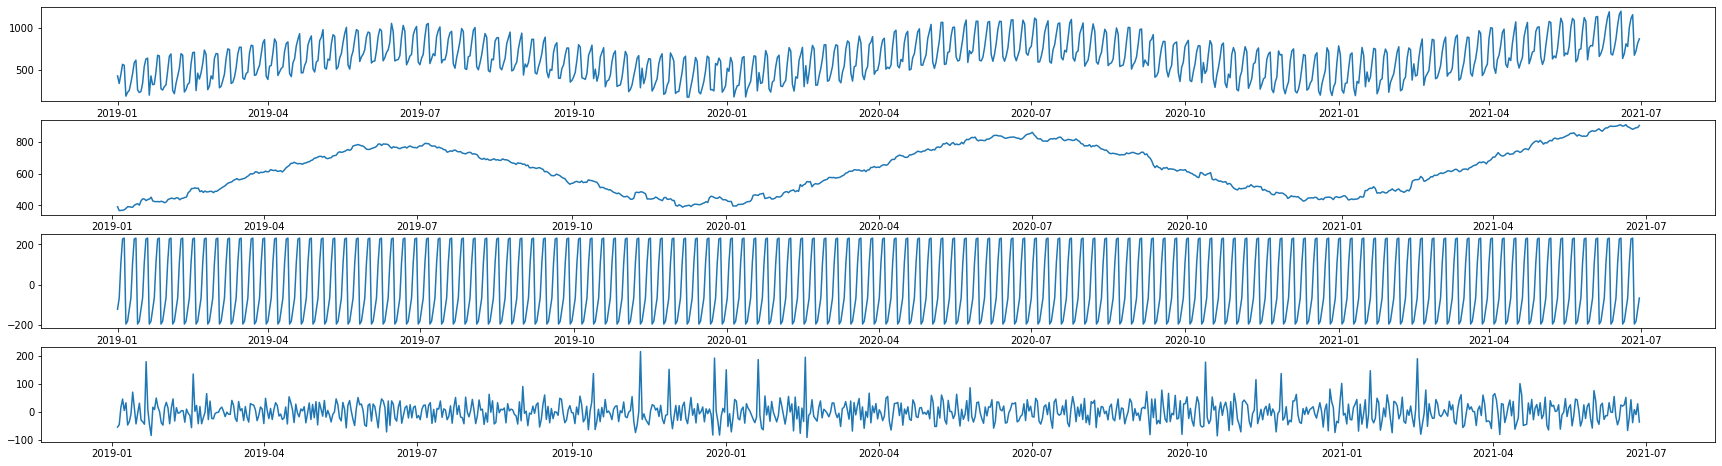

In [102]:
fig, ax = plt.subplots(4,1, figsize = (30,8 ))
ax[0].plot(train)
ax[1].plot(trend)
ax[2].plot(seasonality)
ax[3].plot(resid)
plt.show()

In [103]:
ts

date
2019-01-01    427.0
2019-01-02    337.0
2019-01-03    445.0
2019-01-04    564.0
2019-01-05    552.0
              ...  
2021-12-27    192.0
2021-12-28    344.0
2021-12-29    371.0
2021-12-30    527.0
2021-12-31    817.0
Name: item_count, Length: 1096, dtype: float64

In [104]:
model_final = ExponentialSmoothing(train,trend='add', seasonal='add', seasonal_periods=12).fit()

/usr/local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [105]:
prediction = model_final.predict(start = '2021-07-01', end = '2021-12-31')

In [106]:
mape_exp_smoothning = mean_absolute_percentage_error(y_true = test, y_pred = prediction )
print("MAPE for Exponential Smoothening : ", mape_exp_smoothning)

MAPE for Exponential Smoothening :  0.964917773672707


## function to check stationarity

In [107]:
def test_stationarity(ts):
    # mean and variance for the series
    f , ax = plt.subplots(1,2, figsize = (25,5))
    ax[0].plot(ts, label = 'Original')

    # rolling stats
    rolling_mean = ts.rolling(window = 12).mean()
    rolling_std = ts.rolling(window = 12).std()

    ax[0].plot(rolling_mean, color = 'red', label = 'Rolling Mean')
    ax[0].plot(rolling_std, color = 'black', label = 'Rolling STD')
    ax[0].legend(loc = 'best')

    # Adfuller test
    dftest = adfuller(ts)
    df = pd.Series(dftest[:4], index = ['Test Statistics', 'p-value', '# Lags Used', '# Obs used'])

    if (df['p-value'] >= 0.05):
        ax[1].annotate('Fail to Reject the Null'.center(35), xy = (0.25, 0.8), size = 25)
        ax[1].annotate('Non Stationary'.center(35), xy = (0.25, 0.7), size = 25)
    else :
        ax[1].annotate('Reject the Null'.center(35), xy = (0.25, 0.8), size = 25)
        ax[1].annotate('Stationary'.center(35), xy = (0.25, 0.7), size = 25)

    c = 0.4
    for i in range(4):
        text = '{}    : {:.4f}'.format(df.index[i], df[i])
        ax[1].annotate(text, xy = (0.1, c), size = 15)
        c -= 0.1
    c = 0.4
    for i in dftest[4].keys():
        text = 'Critical Value {}    : {:.4f}'.format(i, dftest[4][i])
        ax[1].annotate(text, xy = (0.5, c), size = 15)
        c -= 0.1
    ax[1].get_xaxis().set_visible(False)
    ax[1].get_yaxis().set_visible(False)
    ax[1].axis('off')
    plt.show()

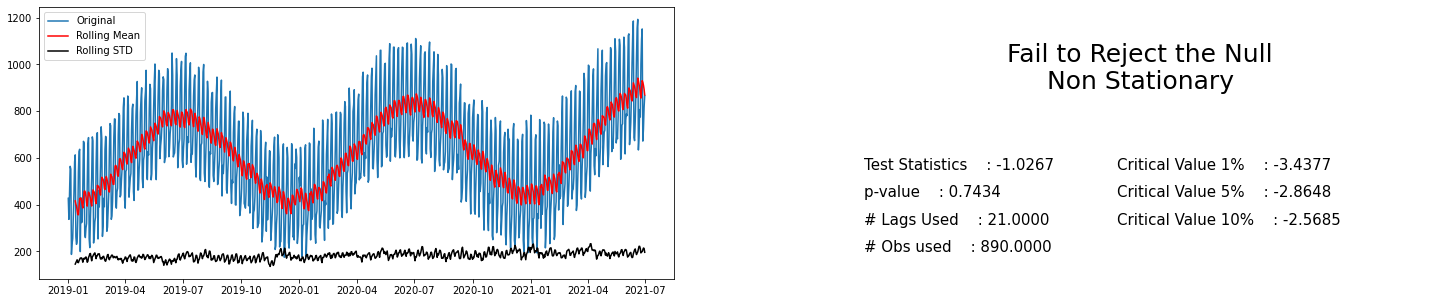

In [108]:
test_stationarity(train)

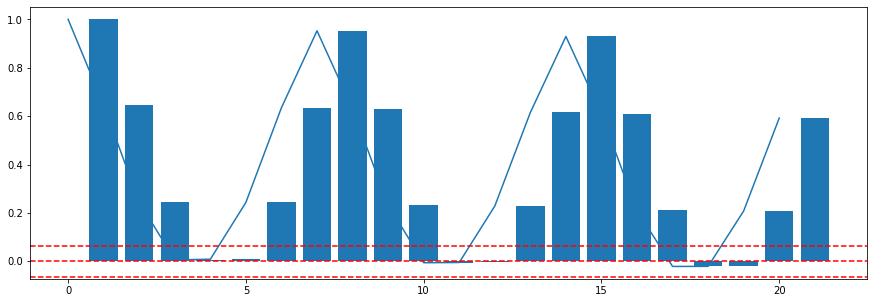

In [109]:
lag_acf = acf(train, nlags = 20)
plt.figure(figsize = (15,5))
plt.bar(range(1, 22),lag_acf)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'red')
plt.axhline(y = -1.96/np.sqrt(len(train)), linestyle = '--', color = 'red')
plt.axhline(y = 1.96/np.sqrt(len(train)), linestyle = '--', color = 'red')
plt.show()

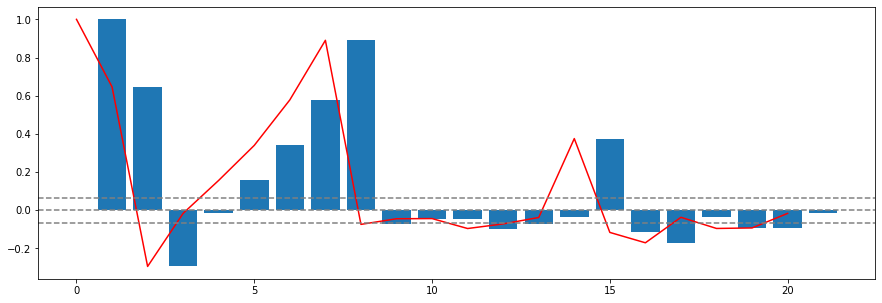

In [110]:
lag_pacf = pacf(train, nlags = 20, method= 'ols')
plt.figure(figsize = (15,5))
plt.bar(range(1, 22),lag_pacf)
plt.plot(lag_pacf, color = 'red')
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(train)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(train)), linestyle = '--', color = 'gray')
plt.show()

# ACF : q term = 2
# PACF : p term = 5

## auto Arima

In [111]:
model = auto_arima(train, trace = True )
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12034.577, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12167.082, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12165.198, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12162.682, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12165.088, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11826.313, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11829.106, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12121.427, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11639.755, Time=1.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11766.417, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11333.702, Time=2.07 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=11419.205, Time=3.09 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=11436.063, Time=3.12 sec
 ARIMA(3,1,2)(0,0,0)[0] i

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

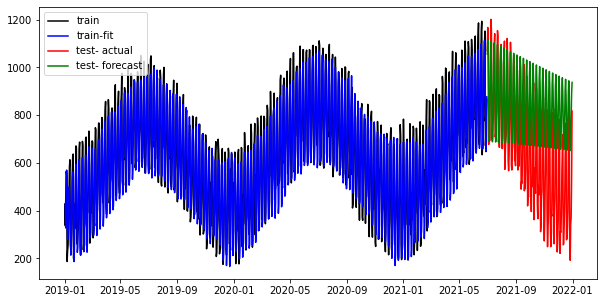

In [112]:
fit = model.predict_in_sample(train)
forecast = model.predict(n_periods=len(test))
test.index

plt.figure(figsize = (10,5))
plt.plot(train, color = 'black', label = 'train')
plt.plot(fit[1:], color = 'blue', label = 'train-fit')
plt.plot(test, color = 'red', label = 'test- actual')
plt.plot(test.index, forecast,color = 'green', label = 'test- forecast')
plt.legend()
plt.show()

# MAPE

In [113]:
mape_arima = mean_absolute_percentage_error(y_true = test, y_pred = forecast)
print("MAPE for ARIMA : ", mape_arima)

MAPE for ARIMA :  0.45318448550200185


# forecast for 3 months

In [114]:
model = auto_arima(ts, trace = True )
model.fit(ts)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14333.447, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14667.307, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14663.301, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14659.656, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14665.311, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14260.139, Time=0.89 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14265.433, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14613.060, Time=0.25 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14033.049, Time=1.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=14226.364, Time=1.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.30 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=13788.549, Time=2.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=13798.755, Time=2.11 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(1,1,5)(0,0,0)[0] interce

ARIMA(order=(2, 1, 5), scoring_args={}, suppress_warnings=True)

In [115]:
model.predict(n_periods = 3*30)

2022-01-01    613.495966
2022-01-02    362.669244
2022-01-03    218.597527
2022-01-04    225.327478
2022-01-05    394.278327
                 ...    
2022-03-27    315.528127
2022-03-28    214.524128
2022-03-29    217.843952
2022-03-30    320.989201
2022-03-31    444.779753
Freq: D, Length: 90, dtype: float64

# restaurant wise prediction using auto arima

In [116]:
def arima_func(train, test):
  model = auto_arima(train )
  model.fit(train)
  pred_test = model.predict(n_periods  = len(test))
  mape_arima = mean_absolute_percentage_error(y_true = test, y_pred = pred_test)
  return mape_arima


In [117]:
mape_results = {}
for rest in restaurants.id:
  ts = merged_data[merged_data.store_id == rest].groupby('date')['item_count'].sum()
  train = ts[ts.index < '01-07-2021']
  test = ts[ts.index >='01-07-2021']
  mape_results[rest] = arima_func(train,test)

In [118]:
mape_results

{1: 0.39963943780585964,
 2: 1412818571072092.0,
 3: 1256181143760882.8,
 4: 1332794522197369.8,
 5: 1264220874069995.0,
 6: 1300516495321220.0}

# Forecasting using Deep Learning


In [119]:
time_ser = data.groupby('date').agg({'sales_amnt': 'sum'})
time_ser

,sales_amnt
date,
2019-01-01,4023.00
2019-01-02,3074.69
2019-01-03,4062.71
2019-01-04,5006.81
2019-01-05,4927.53
...,...
2021-12-27,1867.71
2021-12-28,3426.50
2021-12-29,3715.39


In [120]:
train = time_ser[time_ser.index < '2021-07-01']
test = time_ser[time_ser.index >= '2021-07-01']

# data scaling

In [133]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [134]:
# We're only using one feature in our time series
n_features = 1
length = 12

In [135]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [136]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [137]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [138]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

## fit model

In [139]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/10


/tmp/ipykernel_188/687208369.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,


900/900 [==============================] - 5s 4ms/step - loss: 0.0310 - val_loss: 0.0149
Epoch 2/10
900/900 [==============================] - 3s 4ms/step - loss: 0.0126 - val_loss: 0.0122
Epoch 3/10
900/900 [==============================] - 3s 4ms/step - loss: 0.0100 - val_loss: 0.0106
Epoch 4/10
900/900 [==============================] - 3s 4ms/step - loss: 0.0087 - val_loss: 0.0102
Epoch 5/10
900/900 [==============================] - 3s 4ms/step - loss: 0.0080 - val_loss: 0.0095
Epoch 6/10
900/900 [==============================] - 3s 4ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 7/10
900/900 [==============================] - 3s 4ms/step - loss: 0.0064 - val_loss: 0.0064
Epoch 8/10
900/900 [==============================] - 4s 4ms/step - loss: 0.0056 - val_loss: 0.0077
Epoch 9/10
900/900 [==============================] - 3s 4ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 10/10
900/900 [==============================] - 3s 4ms/step - loss: 0.0048 - val_loss: 0.0039


<AxesSubplot: >

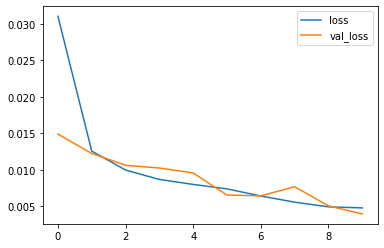

In [140]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate

In [141]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    # store prediction
    test_predictions.append(current_pred)
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 14ms/step


# inverse to get true predictions

In [142]:
true_predictions = scaler.inverse_transform(test_predictions)

In [143]:
test['Predictions'] = true_predictions

/tmp/ipykernel_188/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [144]:
test

,sales_amnt,Predictions
date,,
2021-07-01,10290.33,9393.322783
2021-07-02,11028.59,11052.581781
2021-07-03,10793.51,10843.633762
2021-07-04,6524.13,6708.894455
2021-07-05,7983.57,6366.897313
...,...,...
2021-12-27,1867.71,2850.264902
2021-12-28,3426.50,3422.169430
2021-12-29,3715.39,4168.951364


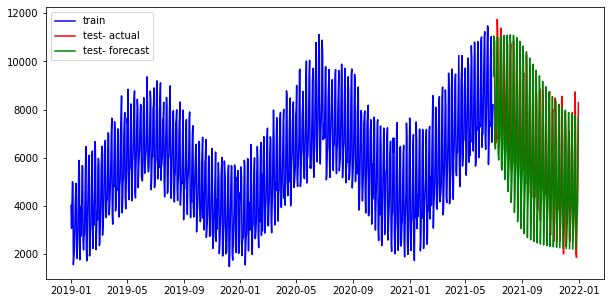

In [145]:
plt.figure(figsize = (10,5))
plt.plot(train, color = 'blue', label = 'train')
plt.plot(test.sales_amnt, color = 'red', label = 'test- actual')
plt.plot(test.index, test.Predictions,color = 'green', label = 'test- forecast')
plt.legend()
plt.show()

<AxesSubplot: xlabel='date'>

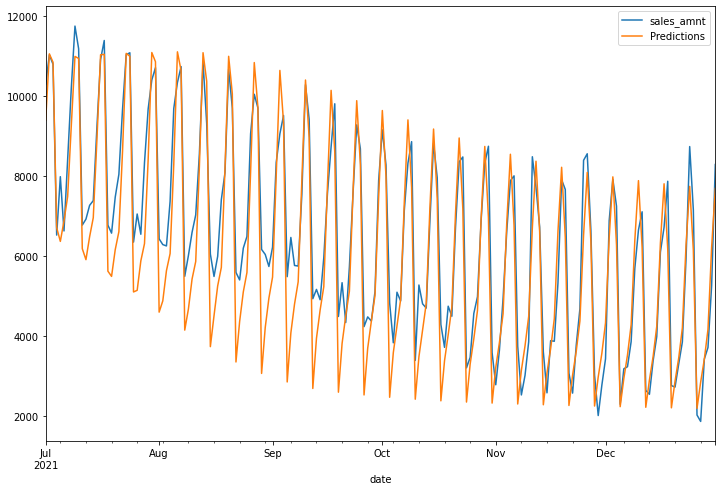

In [146]:
test.plot(figsize=(12,8))

In [147]:
mape_dl = mean_absolute_percentage_error(y_true = test.sales_amnt, y_pred = test.Predictions)
print("MAPE for LSTM : ", mape_dl)

MAPE for LSTM :  0.13688844802861064


In [148]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(time_ser)

In [149]:
length = 3*30 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [150]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit_generator(generator,epochs=8)

Epoch 1/8


/tmp/ipykernel_188/2856022322.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=8)


1006/1006 [==============================] - 20s 19ms/step - loss: 0.0378
Epoch 2/8
1006/1006 [==============================] - 19s 19ms/step - loss: 0.0326
Epoch 3/8
1006/1006 [==============================] - 19s 19ms/step - loss: 0.0136
Epoch 4/8
1006/1006 [==============================] - 19s 19ms/step - loss: 0.0074
Epoch 5/8
1006/1006 [==============================] - 19s 19ms/step - loss: 0.0062
Epoch 6/8
1006/1006 [==============================] - 19s 19ms/step - loss: 0.0054
Epoch 7/8
1006/1006 [==============================] - 19s 19ms/step - loss: 0.0042
Epoch 8/8
1006/1006 [==============================] - 19s 19ms/step - loss: 0.0040


In [151]:
forecast = []
periods = 3*30

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [152]:
forecast = scaler.inverse_transform(forecast)

In [153]:
forecast_dates = pd.date_range(start='2022-01-01 ',periods=3*30, freq = "D")

In [154]:
forecast_data = pd.DataFrame(data=forecast,index=forecast_dates,
                           columns=['Forecast']).squeeze()

In [155]:
forecast_data

2022-01-01    6465.963894
2022-01-02    2422.070381
2022-01-03    2303.236960
2022-01-04    2938.678484
2022-01-05    3521.464816
                 ...     
2022-03-27    1950.827675
2022-03-28    1675.244709
2022-03-29    2157.494482
2022-03-30    2676.205127
2022-03-31    4017.933414
Freq: D, Name: Forecast, Length: 90, dtype: float64

In [156]:
time_ser

,sales_amnt
date,
2019-01-01,4023.00
2019-01-02,3074.69
2019-01-03,4062.71
2019-01-04,5006.81
2019-01-05,4927.53
...,...
2021-12-27,1867.71
2021-12-28,3426.50
2021-12-29,3715.39


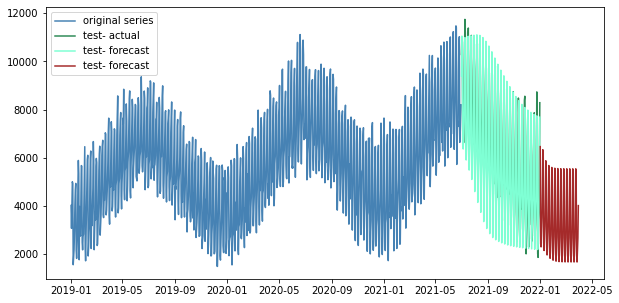

In [157]:
plt.figure(figsize = (10,5))
plt.plot(train.index, train.sales_amnt, color = 'steelblue', label = 'original series')
plt.plot(test.index, test.sales_amnt,color = 'seagreen', label = 'test- actual')
plt.plot(test.index, test.Predictions,color = 'aquamarine', label = 'test- forecast')
plt.plot(forecast_data.index, forecast_data.values, color = 'brown', label = 'test- forecast')
plt.legend()
plt.show()

In [158]:
mape_arima, mape_dl, mape_exp_smoothning

(0.45318448550200185, 0.13688844802861064, 0.964917773672707)

In [159]:
pd.DataFrame([mape_exp_smoothning, mape_arima, mape_dl ], index = ['Exponential Smoothening', 'ARIMA', 'LSTM'])

,0
Exponential Smoothening,0.964918
ARIMA,0.453184
LSTM,0.136888
